In [11]:
# import cogsworth and set some plotting things
import cogsworth
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

plt.rc('font', family='serif')
plt.rcParams['text.usetex'] = False
fs = 24

# update various fontsizes to match
params = {'figure.figsize': (12, 8),
          'legend.fontsize': fs,
          'axes.labelsize': fs,
          'xtick.labelsize': 0.9 * fs,
          'ytick.labelsize': 0.9 * fs,
          'axes.linewidth': 1.1,
          'xtick.major.size': 7,
          'xtick.minor.size': 4,
          'ytick.major.size': 7,
          'ytick.minor.size': 4}
plt.rcParams.update(params)
plt.style.use('dark_background')

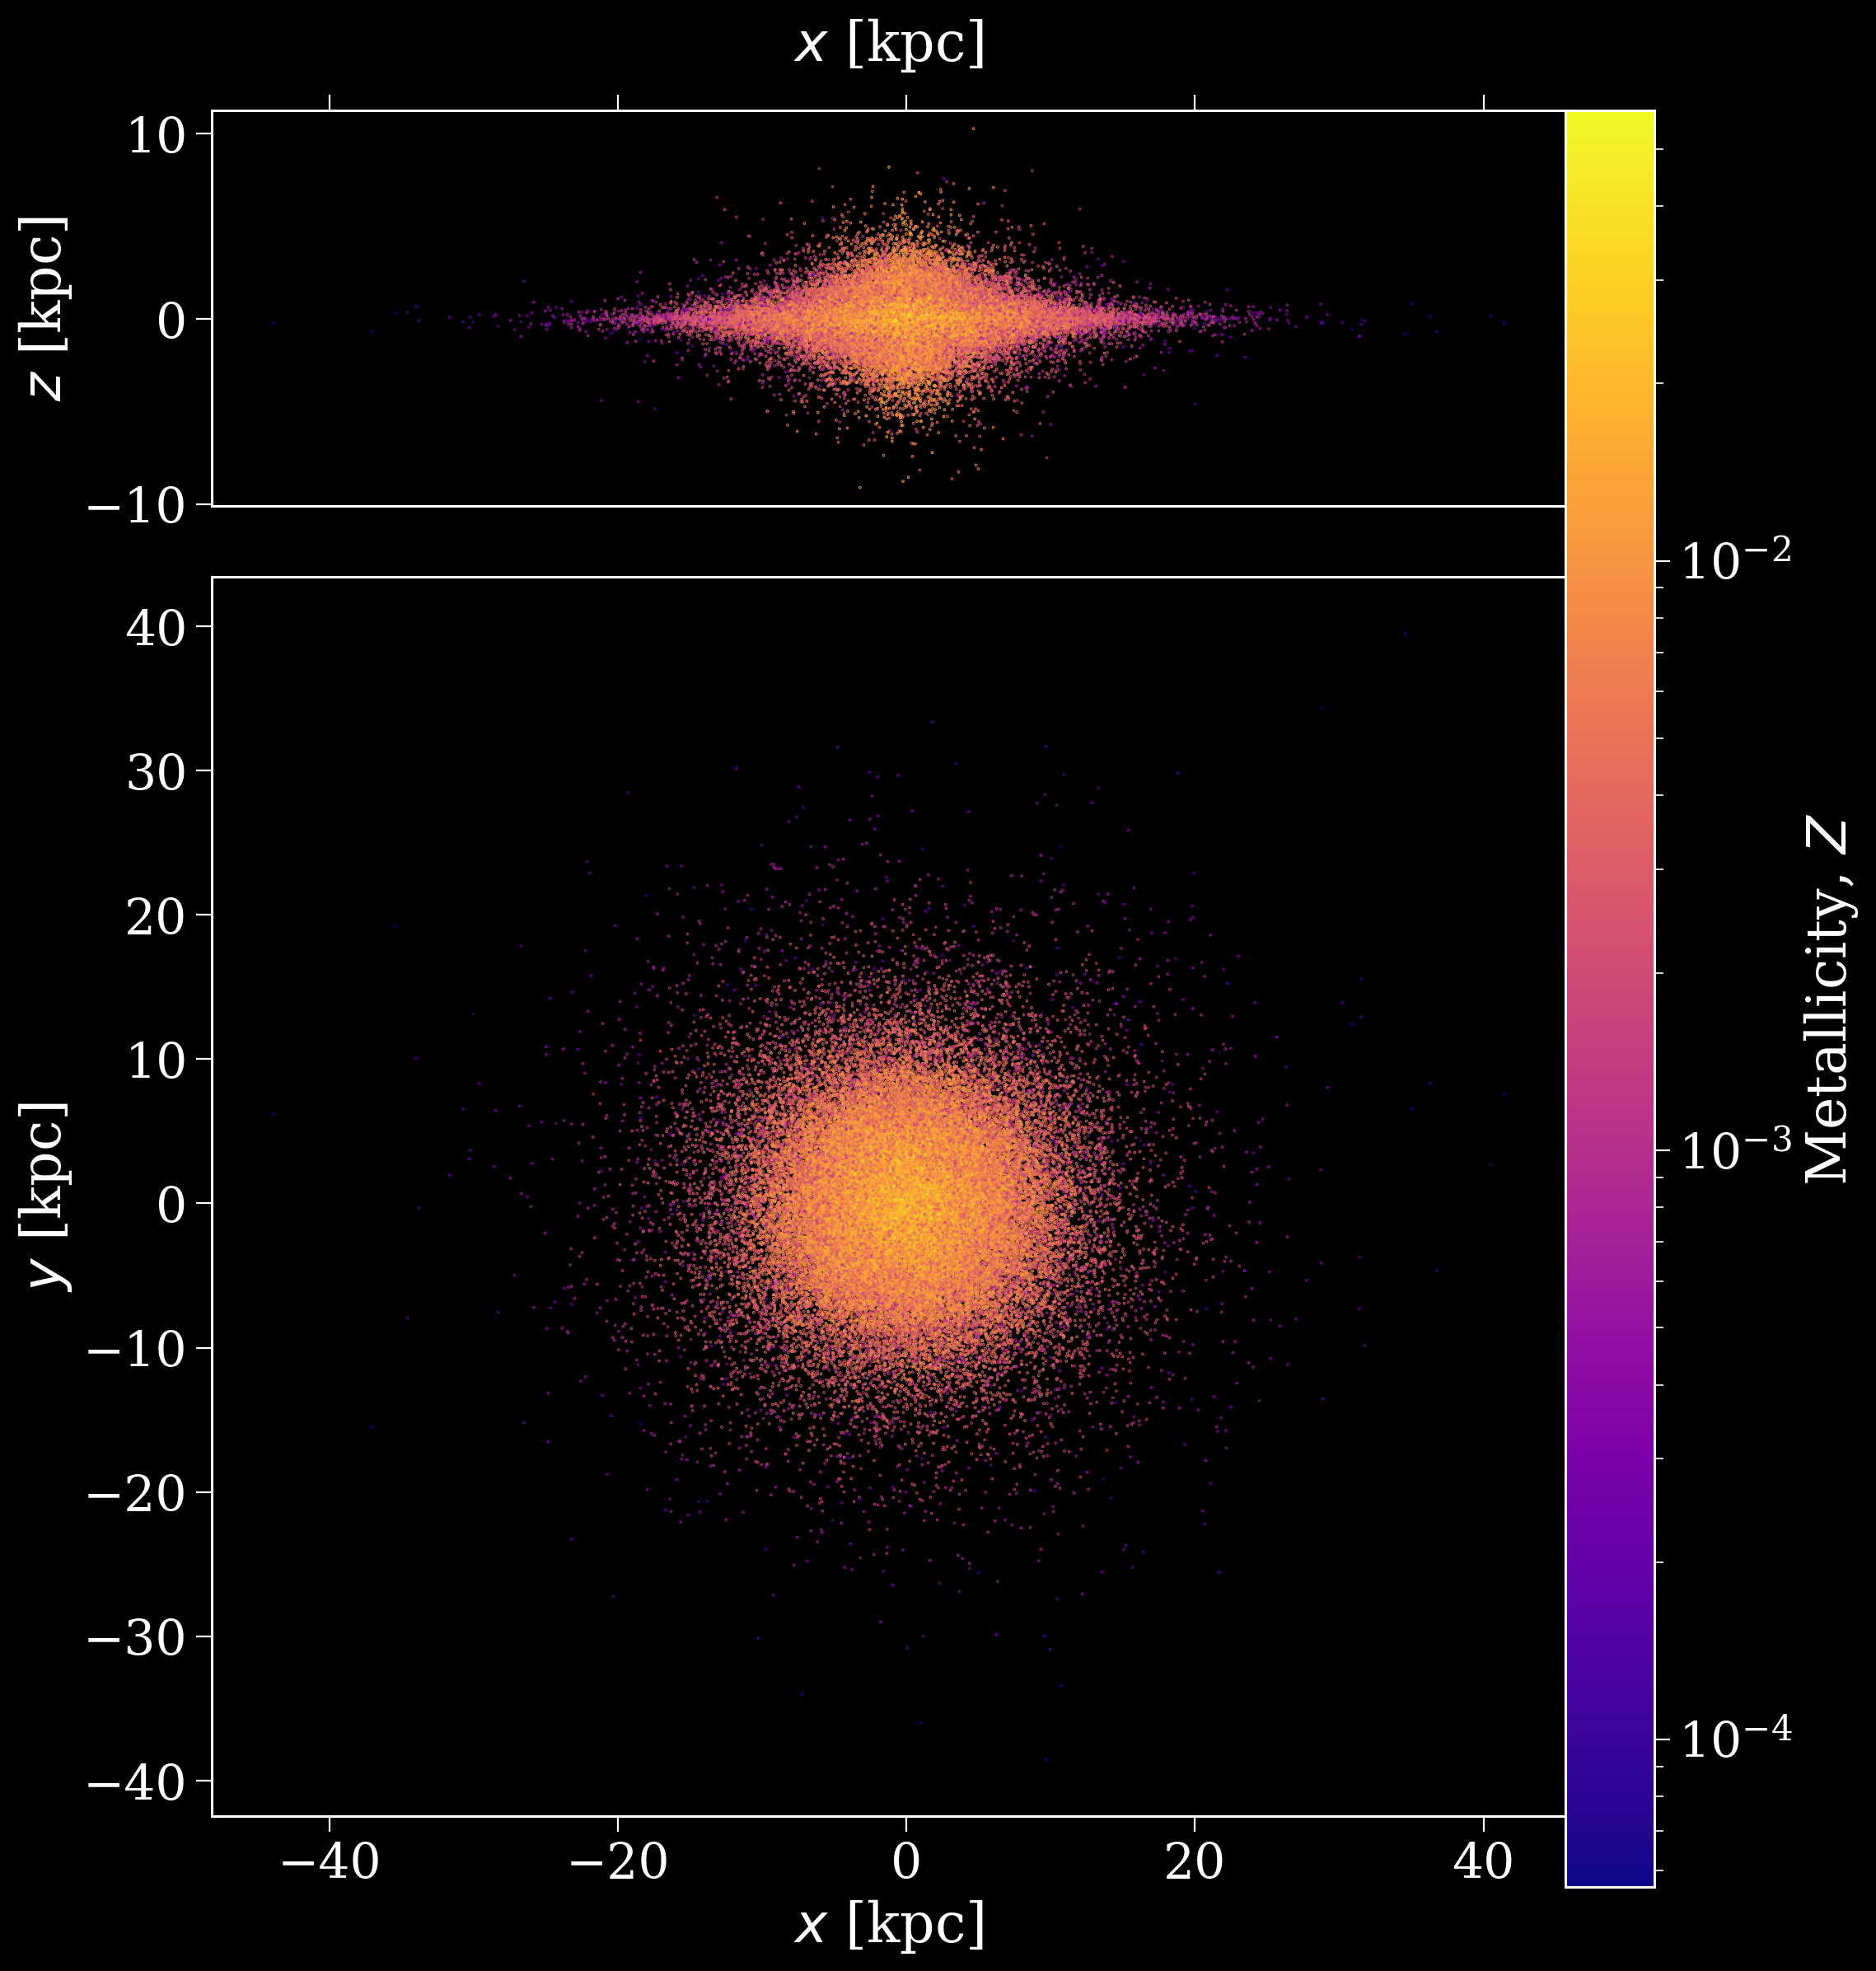

In [19]:
g = cogsworth.galaxy.Frankel2018(size=100000)
g.plot()

Well saving it is remarkably easy, all you need to do is this

In [20]:
g.save("gorgeous_galaxy")

This has just saved two files:

1. ``*-galaxy-params.txt``: A short text file describing your galaxy model parameters
2. ``*.h5``: The sampled parameters themselves (such as positions and metallicities)

But you should never need to interact with these directly, since you can load things back in with a simple call

In [23]:
loaded_g = cogsworth.galaxy.load("gorgeous_galaxy")
assert all(loaded_g.Z == g.Z)

And there's your galaxy, as good as new!

In [26]:
p = cogsworth.pop.Population(100)
p.create_population()

Run for 100 binaries
Ended up with 125 binaries with m1 > 0 solar masses
[3e-02s] Sample initial binaries


[0.4s] Evolve binaries (run COSMIC)


100%|██████████| 125/125 [00:00<00:00, 188.28it/s]


[1.1s] Get orbits (run gala)
Overall: 1.6s


Lovely. Now let's perhaps pick some random things to prove that our loaded population is identical - the total final primary mass of the population and what the first orbit looks like

In [39]:
p.final_bpp["mass_1"].sum()

51.28445539734186

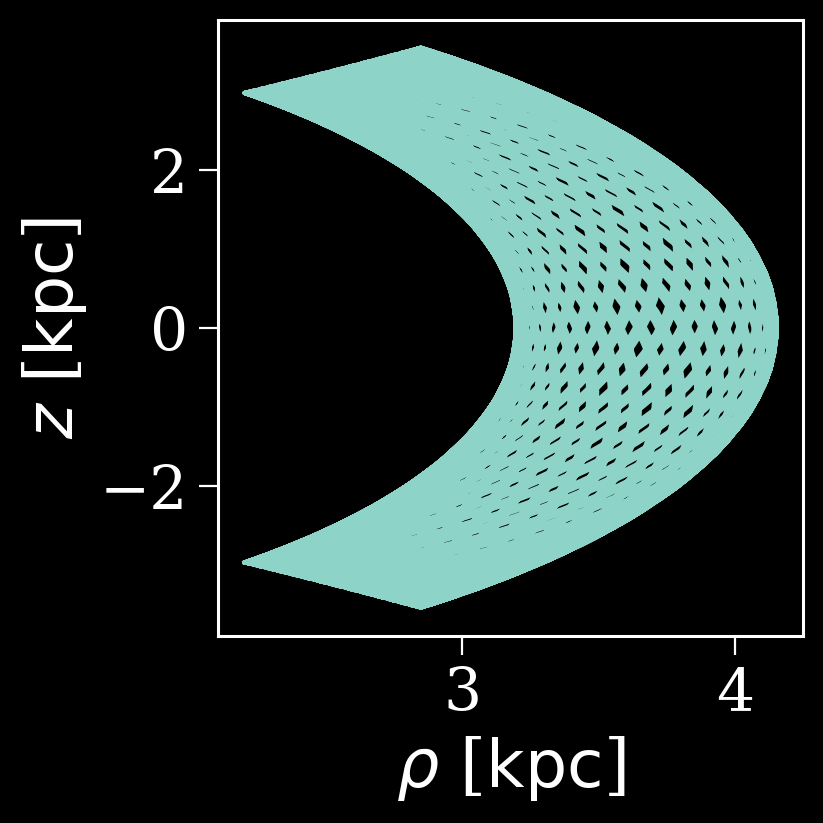

In [40]:
orb = p.orbits[0][0] if isinstance(p.orbits[0], list) else p.orbits[0]
orb.cylindrical.plot(["rho", "z"]);

Okay now for our favourite part - let's save the population for later:

In [41]:
p.save("perfect_population")

That function has saved not just 2 but 4 files that contain the information for your population

1. ``*-galaxy-params.txt``: A short text file describing your galaxy model parameters
2. ``*-potential.txt``: A short text file describing your galactic potential model from Gala
3. ``*-orbits.npy``: The array of galactic orbits of your sources
4. ``*.h5``: The data file, this contains many subtables such as
    - Sampled initial galaxy parameters
    - Sampled initial binaries
    - Evolutionary history of each binary
    - History of supernova kicks for each binary

But as before, no need to worry too much about that as ``cogsworth`` will bring it all back into a population object for you like this

In [42]:
new_p = cogsworth.pop.load("perfect_population")

And let's just confirm that everything looks the before - spoiler alert, it does ;)

In [43]:
new_p.final_bpp["mass_1"].sum()

51.28445539734186

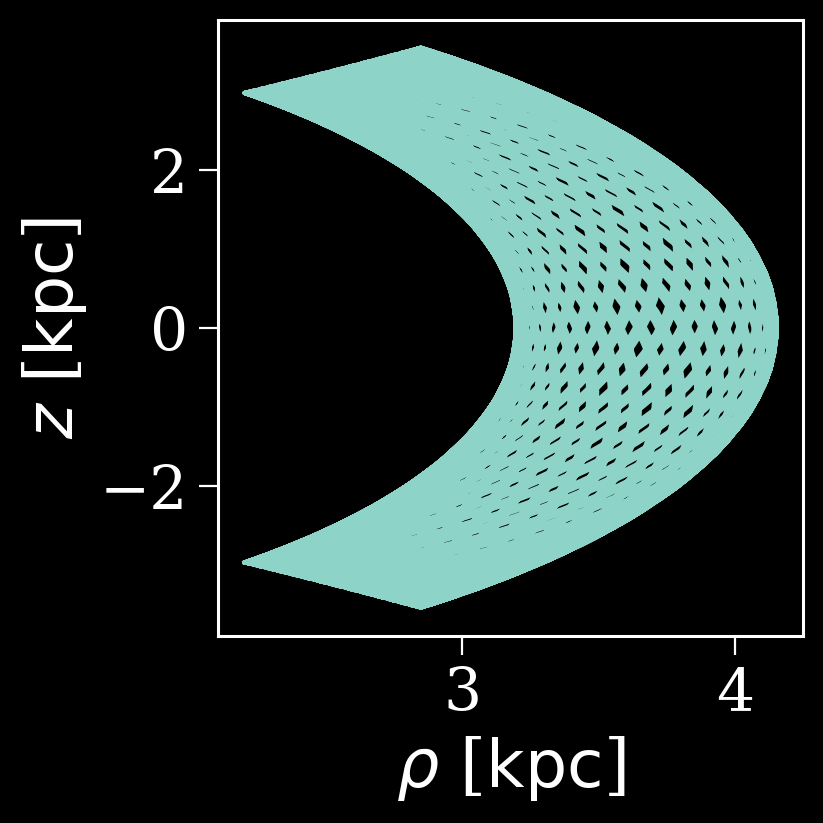

In [44]:
orb = new_p.orbits[0][0] if isinstance(new_p.orbits[0], list) else new_p.orbits[0]
orb.cylindrical.plot(["rho", "z"]);

First we can define some new galaxy class

In [53]:
import numpy as np
import astropy.units as u

# new galaxy where all stars were formed 42 Myr ago
class TomsSwankyNewGalaxy(cogsworth.galaxy.Frankel2018):
    def draw_lookback_times(self, size=None, component="low_alpha_disc"):
        return np.ones(size) * 42 * u.Myr

In [70]:
# make a population with this galaxy class
meaning_of_life = cogsworth.pop.Population(100, galaxy_model=TomsSwankyNewGalaxy)
meaning_of_life.create_population()

Run for 100 binaries
Ended up with 127 binaries with m1 > 0 solar masses
[2e-02s] Sample initial binaries


[0.2s] Evolve binaries (run COSMIC)


100%|██████████| 127/127 [00:00<00:00, 749.75it/s]


[0.3s] Get orbits (run gala)
Overall: 0.6s


In [71]:
meaning_of_life.initial_galaxy.tau

<Quantity [0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042,
           0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042,
           0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042,
           0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042,
           0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042,
           0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042,
           0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042,
           0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042,
           0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042,
           0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042,
           0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042,
           0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042,
           0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042,
           0.042, 0.042, 0.042, 0.042,

Now if we try to save this then ``cogsworth`` will let you, but it'll warn you that it's not sure what to do with ``TomsSwankyNewGalaxy`` and will rely on the parent class instead.

In [63]:
meaning_of_life.save("42")

And as promised we can load it back and the data will be correct

In [65]:
loaded_meaning = cogsworth.pop.load("42")
loaded_meaning.initial_galaxy.tau

<Quantity [0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042,
           0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042,
           0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042,
           0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042,
           0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042,
           0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042,
           0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042,
           0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042,
           0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042,
           0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042,
           0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042,
           0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042,
           0.042, 0.042] Gyr>

But if you try to sample again things may get confusing so beware!

In [68]:
loaded_meaning.galaxy_model

cogsworth.galaxy.Frankel2018

In [69]:
loaded_meaning.sample_initial_galaxy()
loaded_meaning.initial_galaxy.tau

<Quantity [ 9.79507231,  8.10346719,  7.99920902,  4.92590214, 11.68339437,
           11.71871269,  3.60688781, 11.59751032,  1.08704451,  9.03970739,
            9.5370137 ,  3.22190394,  2.46162456,  6.38896641,  7.23536028,
            7.37808787, 10.80147568,  8.81238188,  4.94179002, 10.78621443,
            0.79620402,  6.16270487, 10.86226342,  9.05096787, 10.77290725,
            9.65188869,  9.18260066, 11.6916458 , 11.85589163,  4.02837025,
           10.00124432,  0.01911902,  2.18049084, 11.75616551,  8.24527044,
            8.13163024,  1.85637719,  0.09383739,  5.44653678,  7.85390873,
            1.90082228,  7.10973833, 11.34144244, 11.76361579,  5.74900965,
            8.15632621, 10.32182395, 11.74895307,  8.58865698,  9.041094  ,
            0.78955928,  7.8996257 ,  7.14303379,  7.53060526,  6.42705456,
            7.11143895,  5.99879239,  1.67135272, 11.51756533, 11.1933456 ,
           10.85480097,  8.67097899,  2.29092051,  9.79956438,  4.79663091,
            

Oh no you've reached the end of the tutorial, don't worry I've got a [bunch more](../pages/tutorials.html) to satisfy your cravings!